<a href="https://colab.research.google.com/github/dataeducator/image_classification_with_deep_learning/blob/main/image_classification_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:Image Classification Model with Deep Learning
(Phase 4)

- Student Name: Tenicka Norwood
- Program Pace: self paced
- Scheduled Project Review Time: Tues September 5, 2023 1pm
- Instructor name: Morgan Jones
- Blog post Url: https://medium.com/mlearning-ai/fueling-student-success-1723abd2991b

### Disclaimer:
This Jupyter notebook and its contents are __intended solely for educational purposes__. The included business case and the results of the deep learning models should not be interpreted as medical advice, and have not received endorsement or approval from any professional or medical organization.

The models and outcomes presented here are for illustrative purposes __only__ and should __not__ be be utilized for making real-world decisions without consulting appropriate domain experts and medical professionals. Any actions taken based on the information in this notebook are at the user's own risk.
The author and contributors off this noteboo disclaim any liability for the accuracy, completeness, or efficacy of the information provided.

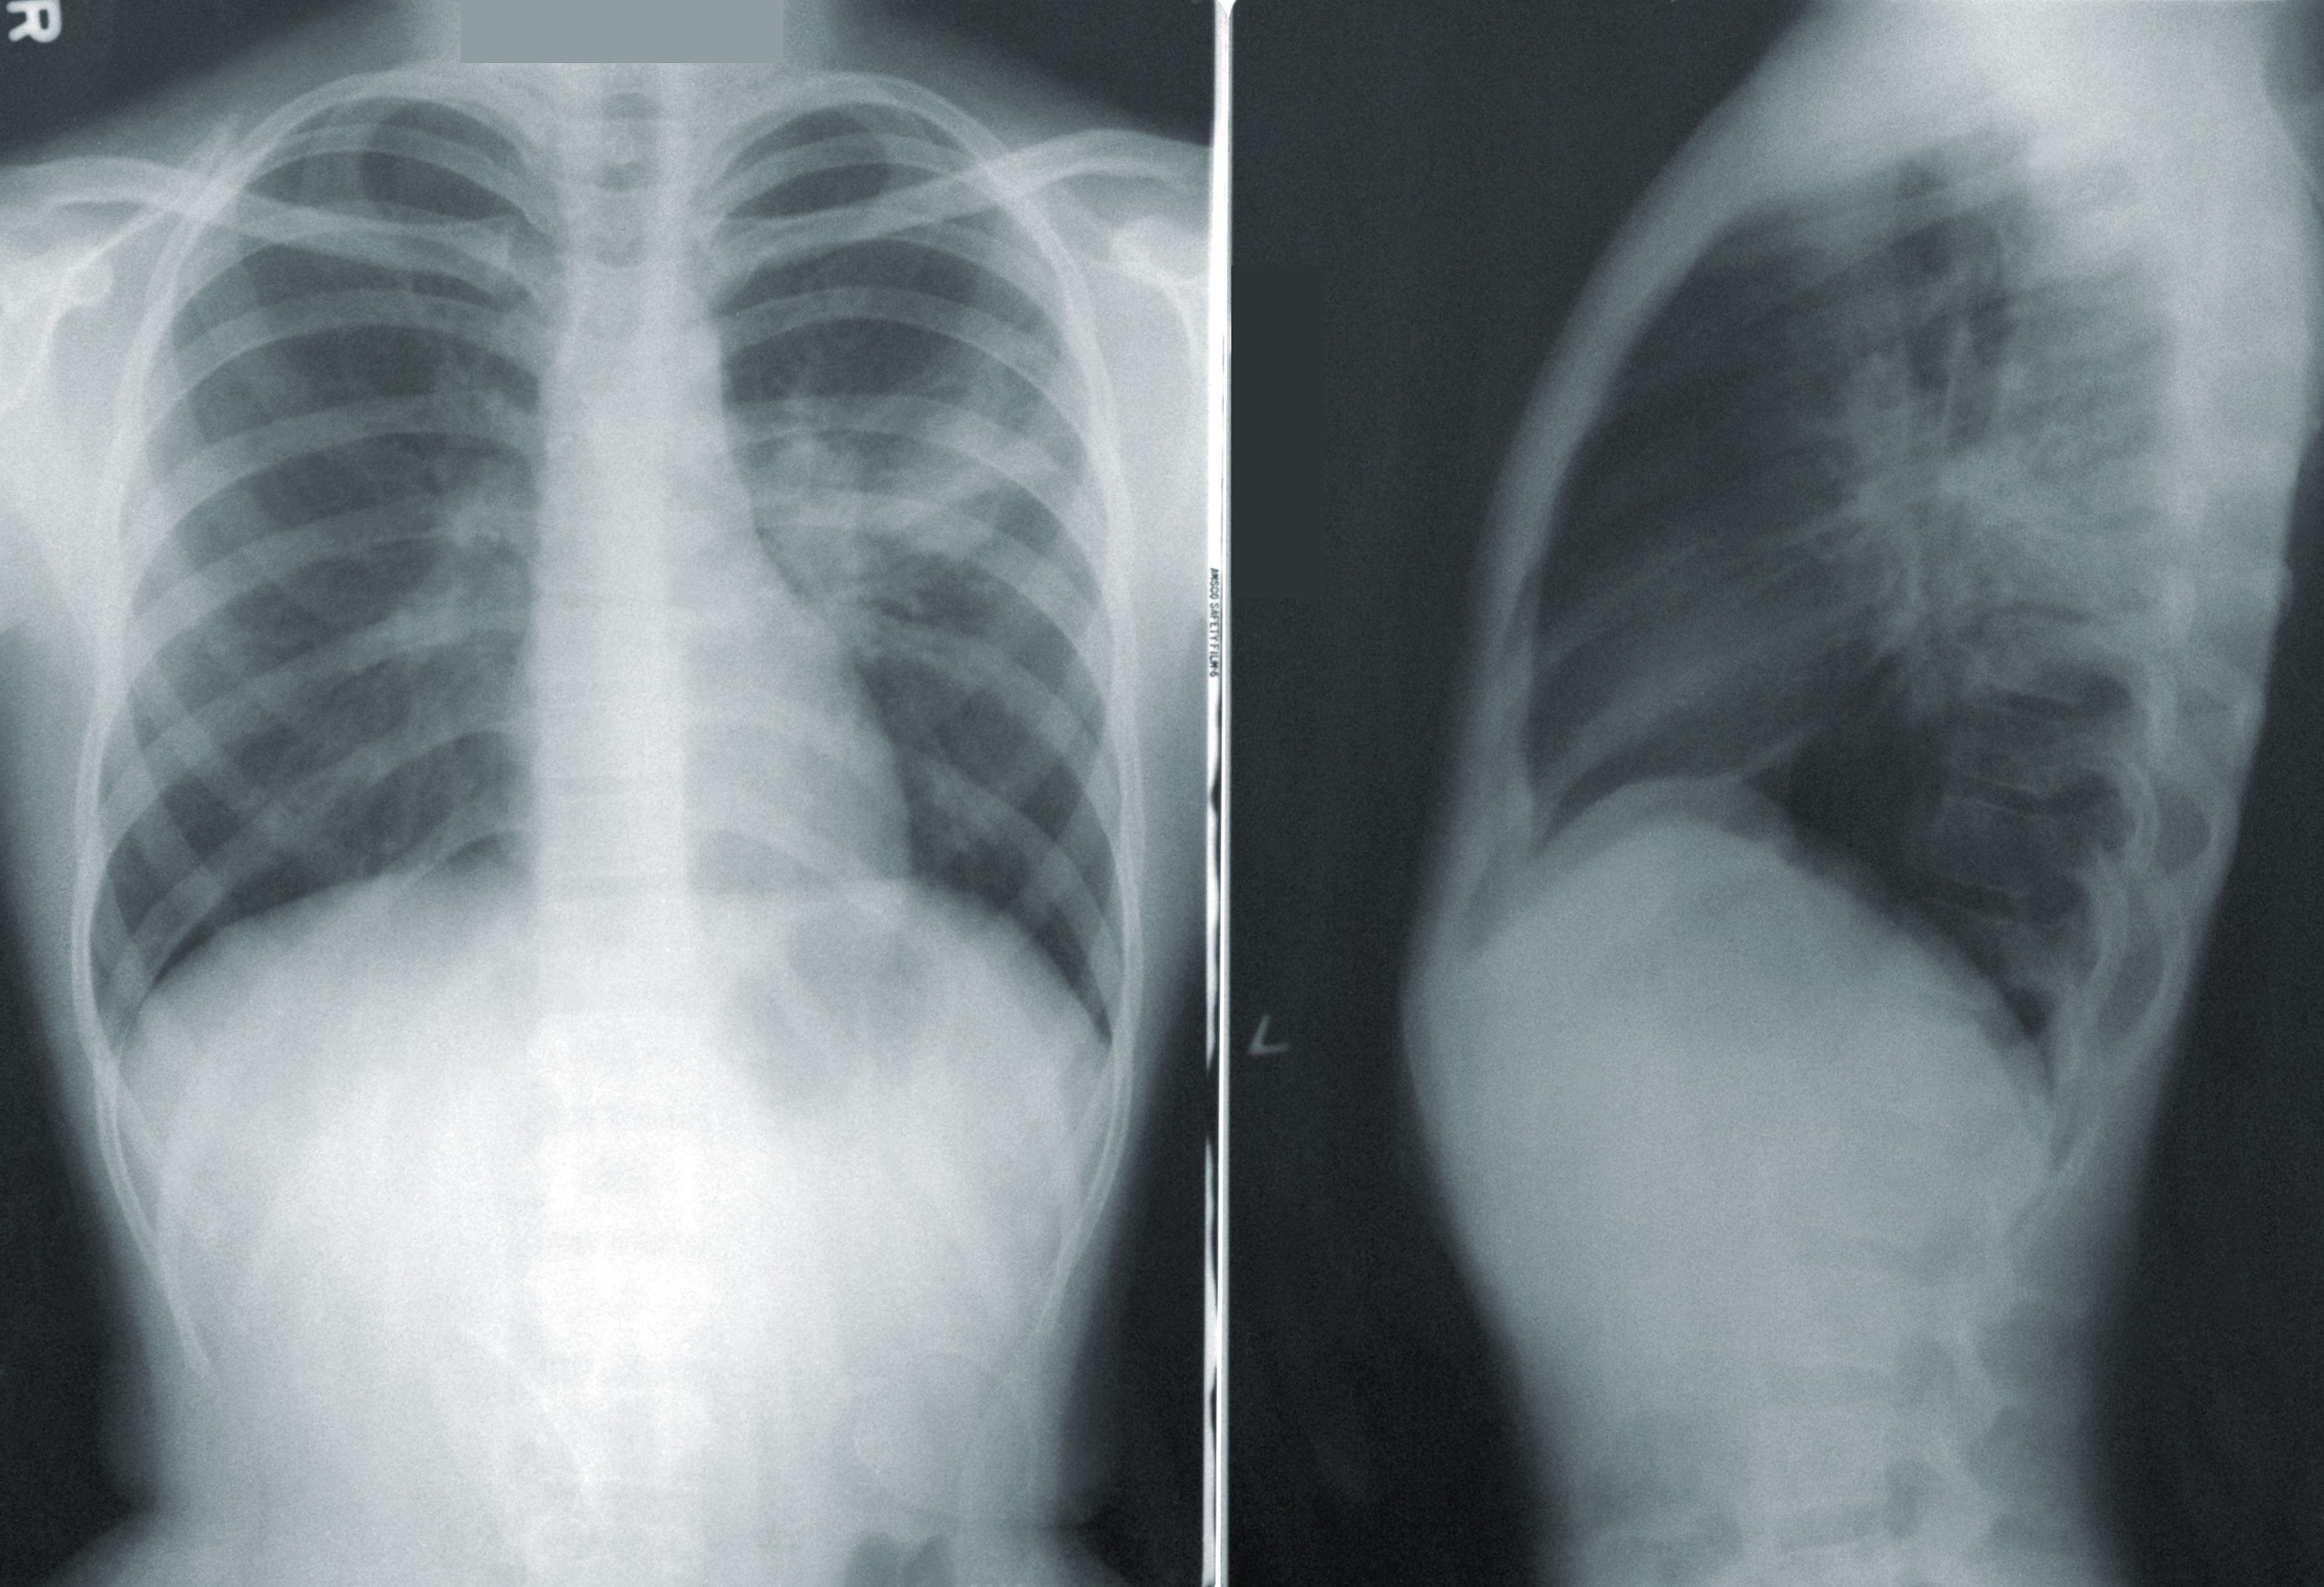





## Business Case
* __Stakeholer__: Zephyr Health Services
* __Business Case__: I am a new data scientist at Zephyr Healthcare Solutions and have been taked with leveraging deep learnin to bolst the company's medical diagnostic systems. Zephyr's obective is to create an optimized Convolutional Neural Network (CNN) for precise pneumonia detection from chest X-ray images, aligning with our commitment to advancing diagnostic accuracy and patient care.

According to a 2022 report (click [here](https://www.jhsph.edu/ivac/wp-content/uploads/2019/10/PDPR_2022.pdf) for full report) by Johns Hopkins over _700 thousand children under 5__ die from pneumonia each year.

Objectives:
The main objectives of this project are:
- Develop a robust and efficient system for early childhood pneumonia detection using a Convolutional Neural Network(CNN) which detects the presence of pneumonia with a __high degree__ of precision.
- Generate a system that can be validated and deployed across a variety of healthcare settings, to reach underserved populations.


## Metrics
We will prioritize precision in this project over accuracy. We will also aim for balance between recall (sensitivity) while maintaining a high level of precision (specificity). With these objectives in mind, the  we aim to reduce the number of false positives and increase the model's ability to correctly identify patients with pneumonia. In this context, false positives could lead to unecessary treatment or interventions.
* __True positives__ are the cases when a model predicts positive instances correctly.
Ex. patients predicted to have PNEUMONIA and do have PNEUMONIA

*__False positives__ are the cases when a model predicts positive instances incorrectly.
Ex. patients predicted to have PNEUMONIA but the chest scan label is NORMAL.

*__False negatives__ are the cases when a model mispredicts negative instances.
Ex. patients predicted to have NORMAL chest scans and do have PNEUMONIA.

\begin{gathered}   
Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive}
\end{gathered}
<br>

</br>

A high precision indicates that when our model predicts the presence of PNEUMONIA, the patient will likely have PNEUMONIA.
<br>

</br>
\begin{gathered}
Recall = \frac{True\ Positive}{False\ Negative + True\ Positive}
\end{gathered}
<br>

</br>

A high precision indicates that when our model predicts the presence of PNEUMONIA, the patient will likely have PNEUMONIA.

For our project we will use F1-score or the harmonic mean of recall and precision.

\begin{gathered}
F1-Score  = \frac{2 \cdot True\ Positive}{2 \cdot True\ Positive + False\ Positive + False\ Negative}
\end{gathered}

Our model will be successful where:

\begin{gathered}
F1-Score  >= .95
\end{gathered}

### Method:
In this project, I will use the __OSEMiN__ pipeline to:

- Obtain → Import the data.
- Scrub → Manage the datatypes, and resolve missing data or duplicates.
- Explore → Identify patterns within the relationships between variables in the data.
- Model → Create a set of predictive models.
- iNterpret → Identify insights and create visualizations of findings.

For our model we could prioritize:

- accuracy - the proportion of correctly predicted labels out of all of the samples in the testing dataset.
- precision - measures the model's accuracy in predicting true positives as a proportion of all positives.
- recall- measures the model's ability to measure all positive instances correctly.
- f1-score - the harmonic mean of precision and recall, used when we want to consider both identifying true positives and minimizing false negatives.

# Obtain
The <code> ObtainData</code>class defines a constructor to initialize the data_path attribute and set data to None. It provides a method <code>load_data</code> to load the dataset from the specified data_path using pandas, assuming the dataset is in .csv format with semicolons as the separator, and assigns the loaded data to the data attribute.
The <code>obtain_data</code> method calls the <code>load_data</code> method and returns the loaded dataset.

To determine answers to my guiding questions, first, I needed to import relevant libraries and packages.

### Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement. The main libraries used within this project include:

* <code>pandas</code>: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
* <code>numpy</code>: a key library that brings the computational power of languages like C to Python
* <code>matplotlib</code>: a comprehensive visualization library
* <code>seaborn</code>: a data visualization library based on matplotlib
* <code>statsmodels</code>: a library used to understand statistical relationships between variables, often used in the field of economics.
* <code>sklearn</code>: a machine learning libary for data processing and modeling.

In [1]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import cv2, time
import datetime
import os
import math
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, InceptionV3, resnet50
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Check library versions
Ensuring the reporducibility of results stands as a cornerstone of effective modeling. In the ever-evolving landscape of information, the refinement of models remains integral to advancing science. An inherent facet of collaborative success lies in transparently conveying the tool versions employed in model generation. This practice not only facilitates seamless collaboration but also equips fellow researchers with a foundation for their own endeavors to replicate this work. As such, we  document the versions of key libraries so that others may replicate and explore this data.

In [2]:
# Check Pandas version
print("Pandas vsersion")
pd.__version__

Pandas vsersion


'1.5.3'

In [3]:
# Check Numpy version
print("Numpy vsersion")
np.__version__

Numpy vsersion


'1.23.5'

In [4]:
# Check Seaborn version
print("Seaborn version")
sns.__version__

Seaborn version


'0.12.2'

In [5]:
# Check Tensorflow version
print("Tensorflow version")
tf.__version__

Tensorflow version


'2.12.0'

# Upload Kaggle API credentials
You need to upload your Kaggle API credentials to work with this project (sign up if you haven't already done so!)
- Go to your Kaggle account settings ('https://www.kaggle.com/account')
-Scroll down to the "API" section and click "Create New API Token"
-This will download a file named 'kaggle.json'
-Upload this file to your Colab environment and then use the following code to download the dataset directly from Kaggle

In [6]:
# Import the Google Drive module for accessing files in Google Drive
from google.colab import drive


In [7]:
# Mount the Google Drive to the '/content/drive' directory
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
# Import the 'os' module for interacting with the operating system
import os

In [9]:
drive_path = '/content/drive/MyDrive/Projects/phase4/pneumonia_dataset/chest_xray'


In [10]:
print(os.getcwd())

/content


In [11]:
os.chdir(drive_path)
print(os.getcwd())

/content/drive/MyDrive/Projects/phase4/pneumonia_dataset/chest_xray


In [12]:

# Set Training File paths
train_path = drive_path + '/train'
train_pneumonia_path = drive_path +'/train/PNEUMONIA'
train_normal_path = drive_path + '/train/NORMAL'

# Set Testing File paths
test_path = drive_path + '/test'
test_pneumonia_path =  drive_path + '/test/PNEUMONIA'
test_normal_path =  drive_path +'/test/NORMAL'

# Set Validation File paths
val_path = drive_path + '/val'
val_pneumonia_path = drive_path + '/val/PNEUMONIA'
val_normal_path = drive_path +'/val/NORMAL'

# Define class names and set names
class_names = ['NORMAL', 'PNEUMONIA']
set_names = ['train', 'test', 'val']



In [13]:
# Create a dictionary to store the number of images in each class for each set
num_images_dict = {}
# Loop through sets and classes to count images
for set_name in set_names:
    num_images_dict[set_name] = {}
    for class_name in class_names:
        path = globals()[f'{set_name.lower()}_{class_name.lower()}_path']
        num_images = len(os.listdir(path))
        num_images_dict[set_name][class_name] = num_images
        print(f'{set_name.capitalize()} {class_name}: {num_images} images')


Train NORMAL: 1342 images
Train PNEUMONIA: 0 images
Test NORMAL: 234 images
Test PNEUMONIA: 390 images
Val NORMAL: 9 images
Val PNEUMONIA: 9 images


In [14]:
import random
import shutil

# Extract the number of train images for pneumonia and normal classes
num_train_images_pneumonia = num_images_dict['train']['PNEUMONIA']
num_train_images_normal = num_images_dict['train']['NORMAL']

# Determie the desired number of images for each class
desired_num_images = min(num_train_images_pneumonia, num_train_images_normal)

# Randomly select a subset of images from the pneumonia class
random_pneumonia_images = random.sample(os.listdir(train_pneumonia_path), desired_num_images)
new_train_pneumonia_path = drive_path + '/train/PNEUMONIA_balanced'
os.makedirs(new_train_pneumonia_path, exist_ok=True)

# Copy the randomly selected pneumonia images to the balanced director
for image in random_pneumonia_images:
  src = os.path.join(train_pneumonia_path, image)
  dst = os.path.join(new_train_pneumonia_path, image)
  shutil.copy(src,dst)

# Update the train_pneumonia_path to the balanced directory
train_pneumonia_path = new_train_pneumonia_path


In [15]:
# Calculate the new number of images after balancing
class_names = ['PNEUMONIA', 'NORMAL']

for class_name in class_names:
  path_var_name = f'train_{class_name.lower()}_path'
  path = locals()[path_var_name]
  new_num_images = len(os.listdir(path))
  print(f'New Number of Training {class_name} Images: {new_num_images}')

New Number of Training PNEUMONIA Images: 0
New Number of Training NORMAL Images: 1342


In [16]:
# Set the paths for original and balanced pneumonia data
original_pneumonia_path = '/content/drive/MyDrive/Projects/phase4/pneumonia_dataset/train/PNEUMONIA'
balanced_pneumonia_path = '/content/drive/MyDrive/Projects/phase4/pneumonia_dataset/train/PNEUMONIA_balanced'
destination_path = '/content/drive/MyDrive/Projects/phase4/pneumonia_dataset/original_train/PNEUMONIA'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Move the original pneumonia data to the destination folder
for image_name in os.listdir(original_pneumonia_path):
    src = os.path.join(original_pneumonia_path, image_name)
    dst = os.path.join(destination_path, image_name)
    shutil.move(src, dst)

print("Original pneumonia data moved to 'original_train' folder.")

Original pneumonia data moved to 'original_train' folder.
